<a href="https://colab.research.google.com/github/CesarRosales16/Urban-Sprawl-SV/blob/main/Expansion_Urbana_AMSS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de la expansión urbana en el AMSS usando técnicas de Teledetección y Machine Learning


## Delimitación espacial

In [1]:
# Google Earth Engine API
import ee
# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=VmEPI371NsYYEzoep97wDJDMuOcT9CVgyNSfseG92J4&tc=GMEY7BK2N6v2dJSS9PObn4HDrE3CCgNDM27FKEAkfmM&cc=Uz--2CT_Tg_sHSnbpizx5is3fV_t8LPDjbaDAXo17Dk

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AX4XfWjBMaL0x47JkxswzOEzvHOJ-jV_k97jrWYUPluA5G0xrHaHOoTUVrA

Successfully saved authorization token.


In [2]:
# Import the Folium library to display interactive maps
import folium

# Define a method for displaying Earth Engine image tiles to folium map.
def add_ee_layer(self, ee_image_object, vis_params, name):
  map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
  folium.raster_layers.TileLayer(
    tiles = map_id_dict['tile_fetcher'].url_format,
    attr = 'Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
    name = name,
    overlay = True,
    control = True
  ).add_to(self)

# Add EE drawing method to folium.
folium.Map.add_ee_layer = add_ee_layer

In [3]:
# Install and import geopandas for manage datasets with geospatial data
!pip install geopandas
import geopandas as gpd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 8.5 MB/s 
     |████████████████████████████████| 16.7 MB 433 kB/s 
     |████████████████████████████████| 6.3 MB 38.1 MB/s 


In [4]:
# Load data from shapefile (.shp) located in GitHub
# https://github.com/CesarRosales16/Urban-Sprawl-SV
mun_datasource_url = 'https://raw.githubusercontent.com/CesarRosales16/Urban-Sprawl-SV/main/datasources/municipios-qgis/municipios_wgs84.shp'
mun_shp_path = '/vsicurl/' + mun_datasource_url
mun_data = gpd.read_file(mun_shp_path)
mun_data.head()

,fid,NOM_DPTO,COD_DPTO,NOM_MUN,COD_MUN,COD_MUN4,TASA_POBR,POBR_FISDL,PERIM_KM,AREA_KM2,POB_TOTAL,POB_HOMB,POB_MUJER,Shape_Leng,Shape_Area,geometry
0,1.0,CHALATENANGO,04,NUEVA CONCEPCION,16,0416,46.6,Pobreza Moderada,111.054433,343.809219,28625,13491,15134,1.015356,0.028779,"POLYGON ((-89.28916 14.24249, -89.28889 14.241..."
1,2.0,CHALATENANGO,04,AGUA CALIENTE,01,0401,57.3,Pobreza Alta,59.338583,128.497304,8261,3820,4441,0.541842,0.010761,"POLYGON ((-89.23636 14.27155, -89.23595 14.271..."
2,3.0,CHALATENANGO,04,LA PALMA,12,0412,52.4,Pobreza Alta,75.920713,150.504556,12235,5781,6454,0.696167,0.012609,"POLYGON ((-89.10319 14.35704, -89.10298 14.356..."
3,4.0,CHALATENANGO,04,SAN IGNACIO,25,0425,55.2,Pobreza Alta,50.199616,57.706536,8611,4055,4556,0.460160,0.004835,"POLYGON ((-89.08244 14.35526, -89.08251 14.355..."
4,5.0,CHALATENANGO,04,CITALA,04,0404,55.7,Pobreza Alta,59.140700,73.623486,4164,1964,2200,0.543241,0.006170,"POLYGON ((-89.34774 14.41833, -89.34478 14.418..."


epsg:4326


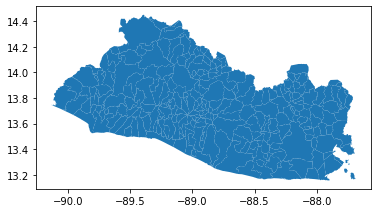

In [5]:
# Set coordinate reference system to dataset (WGS84 = epsg:4326)
mun_data.crs = 'epsg:4326'
print(mun_data.crs)
mun_data.plot()

In [6]:
# Create a new dataset based on AMSS municipalities
mun_amss = ['NEJAPA', 'TONACATEPEQUE', 'CUSCATANCINGO', 'APOPA', 'DELGADO', 'AYUTUXTEPEQUE', 'MEJICANOS', 'SAN SALVADOR',
'SAN MARTIN', 'ILOPANGO', 'SOYAPANGO', 'SAN MARCOS', 'ANTIGUO CUSCATLAN', 'SANTA TECLA']
amss_data = mun_data.loc[mun_data.NOM_MUN.isin(mun_amss)]

In [7]:
# Create a new dataset based on aiditional municipalities, for our case Colon
mun_aditional = ['COLON']
mun_aditional_data = mun_data.loc[mun_data.NOM_MUN.isin(mun_aditional)]

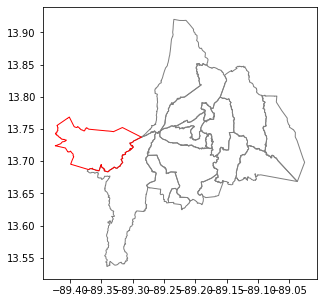

In [8]:
# Plot amss and colon in a single map
ax = amss_data.plot(figsize=(5,5), color='none', edgecolor='gray')
mun_aditional_data.plot(ax=ax, color='none', edgecolor='red')

In [9]:
# Merge AMSS and aditional municipalities in a single dataframe for our ROI (Region Of Interest)
mun_roi = mun_amss + mun_aditional
roi_data = mun_data.loc[mun_data.NOM_MUN.isin(mun_roi)]

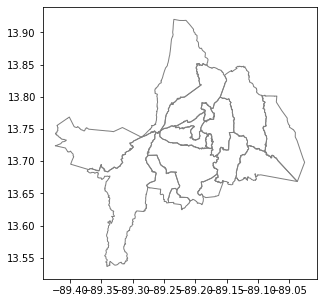

In [10]:
# Plot or ROI
roi_data.plot(figsize=(5,5), color='none', edgecolor='gray')

In [11]:
# Check the CRS for the final df
print(roi_data.crs)

epsg:4326


In [12]:
# Geographic data for SV
sv_lon = -88.89653
sv_lat = 13.794185
sv_poi = ee.Geometry.Point(sv_lon, sv_lat)

In [13]:
# Import json library to transform geopandas to json and then to GEE feature collection
import json

# Create json from our ROI geodataframe
roi_json = json.loads(roi_data.to_json())

# Craete Google Earth Engine FeatureCollection from geojson
roi_fc = ee.FeatureCollection(roi_json)

# Create GEE Geometry from FeatureCollection
roi_geom = ee.Geometry(roi_fc.geometry())

## Clipping landsat images

In [14]:
#Define cloud masks for landsat images
def cloudMaskL8(img):
  '''  
  Function to mask clouds based on the pixel_qa band of Landsat 8 SR data. See:
  https://developers.google.com/earth-engine/datasets/catalog/LANDSAT_LC08_C01_T1_SR
  
  Params:
  -------
  - img: image input Landsat 8 SR image
  
  Return:
  -------
  cloudmasked Landsat 8 image
  '''
  cloudShadowBitMask = (1 << 3)
  cloudsBitMask = (1 << 5)
  # Get the pixel QA band.
  qa = img.select('pixel_qa')
  # Both flags should be set to zero, indicating clear conditions.
  mask = qa.bitwiseAnd(cloudShadowBitMask).eq(0)\
           .And(qa.bitwiseAnd(cloudsBitMask).eq(0))
  return img.updateMask(mask)   

def cloudMaskL457(img):
  '''  
  Function to mask clouds based on the pixel_qa band of Landsat 4/5/7 SR data. See:
  https://developers.google.com/earth-engine/datasets/catalog/LANDSAT_LT05_C01_T1_SR
  
  Params:
  -------
  - img: image input Landsat 4/5/7 SR image
  
  Return:
  -------
  cloudmasked Landsat 4/5/7 image
  '''
  # Get the pixel QA band.
  qa = img.select('pixel_qa')
  # If the cloud bit (5) is set and the cloud confidence (7) is high or the cloud shadow bit is set (3), then it's a bad pixel.
  cloud = qa.bitwiseAnd(1 << 5)\
                  .And(qa.bitwiseAnd(1 << 7))\
                  .Or(qa.bitwiseAnd(1 << 3))
  # Remove edge pixels that don't occur in all bands
  mask = img.mask().reduce(ee.Reducer.min())
  return img.updateMask(cloud.Not()).updateMask(mask)   

In [ ]:
# Clipping landsat image
"""
Params needed to landsat image
landsat_collection_path = 'LANDSAT/LC08/C01/T1_SR'
initial_date = '2015-01-01'
final_date = '2015-12-31'
sort_filter = 'CLOUD_COVER'
"""

# Load Landsat Collection
landsat_collection = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR')


# Clips image to desired area
clipped_image = landsat_collection\
  .filterBounds(roi_geom)\
  .filterDate('2015-01-01','2015-12-31')\
  .filter(ee.Filter.lt('CLOUD_COVER', 20))\
  .map(cloudMaskL8)\
  .median()\
  .clip(roi_geom)

"""# Clips image to desired area
clipped_image = landsat_collection\
  .filterBounds(roi_geom)\
  .filterDate('2015-01-01','2015-12-31')\
  .filter(ee.Filter.lt('CLOUD_COVER', 20))\
  .map(maskS2clouds)\ 
  .median()\
  .multiply(0.0001)\ 
  .clip(roi_geom)"""

# Set visualization parameters
vis_params = {
    'bands':['B4', 'B3', 'B2'], 
    'min': 0, 
    'max': 3000, 
    'gamma': 1.4
}

### Obtener imagenes landsat de forma dinamica

In [15]:
# Function that retrieves Landsat Collection number for a given year
def getLandsatCollectionNumber(year):
  if year >= 1985 and year <= 1999:
    return 'LT05'
  elif year >= 2000 and year <= 2013:
    return 'LE07'
  elif year >= 2014 and year <= 2021:
    return 'LC08'

In [24]:
# Function that clips a single Landsat Image given landsat collection number, a year, a roi and a porcentage of cloud contamination
def clipLandsatImage(year, landsat_number, cloud_contamination, roi):

  landsat_path = 'LANDSAT/' + landsat_number + '/C01/T1_SR'
  initial_date = str(year) + '-01-01'
  end_date = str(year) + '-12-31'

  landsat_collection = ee.ImageCollection(landsat_path)

  clipped_image = landsat_collection\
    .filterBounds(roi)\
    .filterDate(initial_date, end_date)\
    .filter(ee.Filter.lt('CLOUD_COVER', cloud_contamination))\
    .map(cloudMaskL8 if landsat_number == 'LC08' else cloudMaskL457)\
    .median()\
    .clip(roi)

  return clipped_image

In [25]:
# Function that clips n Landsat Images in a range of years, given a cloud contamination percentage and a roi
def clipLandsatImagesInRange(initial_year, end_year, cloud_contamination, roi):
  clipped_images = []
  for year in range(initial_year, end_year + 1):
    landsat_num = getLandsatCollectionNumber(year)
    clipped_images.append(clipLandsatImage(year, landsat_num, cloud_contamination, roi_geom))
  print("Number of clipped images: ", len(clipped_images))
  return clipped_images

In [26]:
clipped_images = clipLandsatImagesInRange(initial_year=1992, end_year=2021, cloud_contamination=30, roi=roi_geom)

Number of clipped images:  30


In [27]:
# Define a map centered on El Salvador
my_map = folium.Map(location=[sv_lat, sv_lon], zoom_start=9, max_bounds=True)

In [28]:
#Add Boundaries layer
# Reference: https://developers.google.com/earth-engine/guides/feature_collections_visualizing
my_map.add_ee_layer(roi_fc.draw('006600', 3, 2), {}, 'Study Area Boundaries')

In [29]:
# Set visualization parameters
vis_params_L8 = {
    'bands':['B4', 'B3', 'B2'], 
    'min': 0, 
    'max': 3000, 
    'gamma': 1.4
}

# Set visualization parameters
vis_params_L457 = {
    'bands':['B3', 'B2', 'B1'], 
    'min': 0, 
    'max': 3000, 
    'gamma': 1.4
}

In [30]:
initial_year = 1992
end_year = 2021
for year in range(initial_year, end_year + 1):
  my_map.add_ee_layer(clipped_images[year - initial_year], vis_params_L8 if year >= 2014 else vis_params_L457, 'Landsat ' + str(year))

In [31]:
# Add a layer control panel to the map
my_map.add_child(folium.LayerControl())

# Displays the map
display(my_map)

#### 1992
El mapa de 1992 no se muestra debido a que las imagenes estan altamente contaminadas de nubes por lo que el filtro de nubes no pasa, asi mismo, sale cortada. En su lugar se usara la imagen de 1991.

In [34]:
# Load Landsat Collection
landsat_collection = ee.ImageCollection('LANDSAT/LT05/C01/T1_SR')

# Clips image to desired area
"""clipped_image = landsat_collection\
  .filterBounds(roi_geom)\
  .filterDate('1991-01-01','1991-12-31')\
  .median()\
  .clip(roi_geom)"""

clipped_image = landsat_collection\
    .filterBounds(roi_geom)\
    .filterDate('1991-01-01','1991-12-31')\
    .filter(ee.Filter.lt('CLOUD_COVER', 20))\
    .map(cloudMaskL457)\
    .median()\
    .clip(roi_geom)

  # Define a map centered on El Salvador
my_map = folium.Map(location=[sv_lat, sv_lon], zoom_start=9, max_bounds=True)

#Add Boundaries layer
my_map.add_ee_layer(roi_fc.draw('006600', 3, 2), {}, 'Study Area Boundaries')

# Add the clipped image layer
my_map.add_ee_layer(clipped_image, vis_params_L457, 'Landsat clipped image L5 - 1992')

# Add a layer control panel to the map
my_map.add_child(folium.LayerControl())

# Displays the map
display(my_map)

## Satellite Imagery Classification

### Cart Classifier (video)

In [ ]:
#Importing training data
training = ee.FeatureCollection('users/midekisa/Train_Cover_CA')

label = 'Class'
bands = ['B1', 'B2', 'B3', 'B4', 'B5', 'B7']
input = clipped_image.select(bands)

train_image = input.sampleRegions(**{
    'collection': training,
    'properties': [label],
    'scale': 30
})

training_data = train_image.randomColumn()

train_set = training_data.filter(ee.Filter.lessThan('random', 0.8))
test_set = training_data.filter(ee.Filter.greaterThanOrEquals('random', 0.8))

In [ ]:
# Classification model using CART
cart_classifier = ee.Classifier.smileCart().train(train_set, label, bands)

# Classify the image
classified_image = input.classify(cart_classifier)

# Define palette for the clasification
land_cover_palette = [
                      '#0C2C84', # water (0)
                      '#E31A1C', # urban (1)
                      '#005A32', # forest (2)
                      '#FF8000', # crop (3)
                      '#969696', # barren (4)

]

### CART classifier AMSS

In [ ]:
train_datasource_url = 'https://raw.githubusercontent.com/CesarRosales16/Urban-Sprawl-SV/main/datasources/train-data/TrainCoverAMSSC.shp'
train_shp_path = '/vsicurl/' + train_datasource_url
train_data = gpd.read_file(train_shp_path)
train_data.head()

,Class,geometry
0,0,POINT (-89.06572 13.67649)
1,0,POINT (-89.06298 13.69317)
2,0,POINT (-89.06092 13.67950)
3,0,POINT (-89.06572 13.69017)
4,0,POINT (-89.06235 13.68441)


In [ ]:
# Create json from geodataframe
train_json = json.loads(train_data.to_json())

In [ ]:
#Importing training data
training = ee.FeatureCollection(train_json)

label = 'Class'
bands = ['B1', 'B2', 'B3', 'B4', 'B5', 'B7']
input = clipped_image.select(bands)

train_image = input.sampleRegions(**{
    'collection': training,
    'properties': [label],
    'scale': 30
})


training_data = train_image.randomColumn()

train_set = training_data.filter(ee.Filter.lessThan('random', 0.8))
test_set = training_data.filter(ee.Filter.greaterThanOrEquals('random', 0.8))

In [ ]:
# Classification model using CART
cart_classifier = ee.Classifier.smileCart().train(train_set, label, bands)

# Classify the image
classified_image = input.classify(cart_classifier)

# Define palette for the clasification
land_cover_palette = [
                      '#0C2C84', # water (0)
                      '#E31A1C', # urban (1)
                      '#005A32', # forest (2)
]

## Mapping layers

In [ ]:
# Define a map centered on El Salvador
my_map = folium.Map(location=[sv_lat, sv_lon], zoom_start=9, max_bounds=True)

#Add Boundaries layer
# Reference: https://developers.google.com/earth-engine/guides/feature_collections_visualizing
"""study_area_boundaries = ee.Image().paint(study_area_feature_collection, 1, 2)
my_map.add_ee_layer(study_area_boundaries, {'palette': 'FF0000'}, 'Boundaries')"""
my_map.add_ee_layer(roi_fc.draw('006600', 3, 2), {}, 'Study Area Boundaries')

# Add the clipped image layer
my_map.add_ee_layer(clipped_image, vis_params, 'Landsat clipped image')

# Add clasified image
my_map.add_ee_layer(classified_image, {'palette': land_cover_palette, 'min': 0, 'max': 2}, 'Cart classification')

# Add a layer control panel to the map
my_map.add_child(folium.LayerControl())

# Displays the map
display(my_map)

In [ ]:
"""clipped_url = clipped_image.getMapId(vis_params)

print(ee.Image.getThumbURL([sv_lat, sv_lon], {'Landsat clipped image URL': clipped_url}))"""

"clipped_url = clipped_image.getMapId(vis_params)\n\nprint(ee.Image.getThumbURL([sv_lat, sv_lon], {'Landsat clipped image URL': clipped_url}))"

## Export to GeoTIFF

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Path where geotiff are saved
drive_path = "GeoTIFFs"

In [ ]:
!pip install rasterio

     |████████████████████████████████| 19.3 MB 5.1 MB/s 


### Export classified image

In [ ]:
# Export the image, specifying scale and region.
task = ee.batch.Export.image.toDrive(**{
    'image': classified_image,
    'description': 'Landasat 8 clasificada',
    'folder': drive_path,
    'scale': 30,
    'region': roi_geom
})
task.start()

In [ ]:
import time 
while task.active():
  print('Polling for task (id: {}).'.format(task.id))
  time.sleep(10)

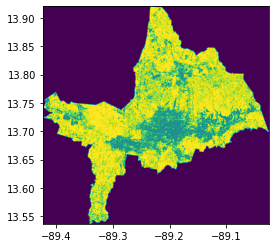

In [ ]:
import rasterio
from rasterio.plot import show
fp = r'drive/My Drive/GeoTIFFs/Landasat 8 clasificada.tif'
img = rasterio.open(fp)
show(img)

### Export clipped img 

In [ ]:
# Export the image, specifying scale and region.
task = ee.batch.Export.image.toDrive(**{
    'image': clipped_image,
    'description': 'Landasat 8 cortada',
    'folder': drive_path,
    'scale': 30,
    'region': roi_geom
})
task.start()

In [ ]:
import time 
while task.active():
  print('Polling for task (id: {}).'.format(task.id))
  time.sleep(10)

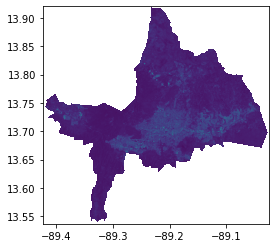

In [ ]:
import rasterio
from rasterio.plot import show
fp = r'drive/My Drive/GeoTIFFs/Landasat 8 cortada.tif'
img = rasterio.open(fp)
show(img)